In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [2]:
bookdata = pd.read_csv('book.csv',encoding='latin1')
bookdata

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [3]:
bookdata.shape

(10000, 4)

In [4]:
bookdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [5]:
bookdata.describe(include='all')

,Unnamed: 0,User.ID,Book.Title,Book.Rating
count,10000.00000,10000.000000,10000,10000.00000
unique,NaN,NaN,9659,NaN
top,NaN,NaN,Fahrenheit 451,NaN
freq,NaN,NaN,5,NaN
mean,5000.50000,95321.249800,NaN,7.56630
std,2886.89568,117645.703609,NaN,1.82152
min,1.00000,8.000000,NaN,1.00000
25%,2500.75000,2103.000000,NaN,7.00000
50%,5000.50000,3757.000000,NaN,8.00000
75%,7500.25000,162052.000000,NaN,9.00000


In [6]:
bookdata.drop('Unnamed: 0',inplace=True,axis=1)

In [7]:
bookdata.rename({'User.ID':'User_Id','Book.Title':'Title','Book.Rating':'Rating'},axis=1,inplace=True)

In [8]:
bookdata.head()

,User_Id,Title,Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [9]:
bookdata.User_Id.nunique()

2182

In [10]:
len(bookdata.Title.unique())

9659

In [11]:
bookdata.Title.value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Title, Length: 9659, dtype: int64

In [12]:
bookdata.Rating.value_counts().sort_index()

1       43
2       63
3      146
4      237
5     1007
6      920
7     2076
8     2283
9     1493
10    1732
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

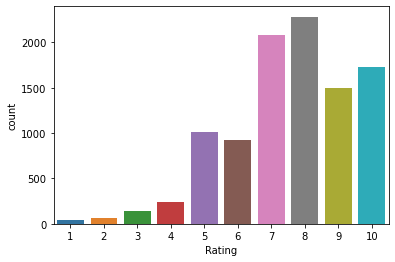

In [28]:
sns.countplot(x="Rating",data=bookdata)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


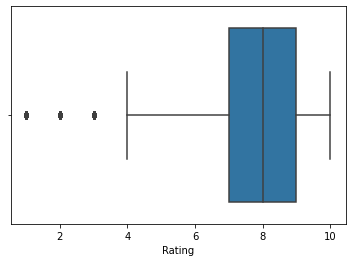

In [34]:
sns.boxplot('Rating',data=bookdata)
plt.show()

In [13]:
item_book_df = bookdata.pivot_table(index='Title',
                                 columns='User_Id',
                                 values='Rating')

In [14]:
item_book_df

User_Id,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Stories;Merril;1985;McClelland &amp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Repairing PC Drives &amp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"\Well, there's your problem\: Cartoons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [15]:
item_book_df.fillna(0,inplace=True)
item_book_df

User_Id,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
Title,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [16]:
item_similarity = 1 - pairwise_distances( item_book_df.values,metric='cosine')

In [17]:
item_similarity

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [18]:
item_sim_df = pd.DataFrame(item_similarity)
item_sim_df.columns = bookdata['Title'].unique()
item_sim_df.index = bookdata['Title'].unique()
item_sim_df

,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,The Mummies of Urumchi,The Kitchen God's Wife,What If?: The World's Foremost Military Historians Imagine What Might Have Been,PLEADING GUILTY,Under the Black Flag: The Romance and the Reality of Life Among the Pirates,Where You'll Find Me: And Other Stories,...,The Cloister Walk,Open Water,The Evolution of Jane,AT PARADISE GATE,I Should Have Stayed Home: The Worst Trips of the Great Writers (Travel Literature Series),American Fried: Adventures of a Happy Eater.,Cannibal In Manhattan,How to Flirt: A Practical Guide,Twilight,Kids Say the Darndest Things
Classical Mythology,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clara Callan,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Decision in Normandy,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Mummies of Urumchi,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
American Fried: Adventures of a Happy Eater.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Cannibal In Manhattan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
How to Flirt: A Practical Guide,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Twilight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
item_sim_df.iloc[0:5, 0:5]

,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,The Mummies of Urumchi
Classical Mythology,1.0,1.0,1.0,0.0,0.0
Clara Callan,1.0,1.0,1.0,0.0,0.0
Decision in Normandy,1.0,1.0,1.0,0.0,0.0
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,0.0,0.0,0.0,1.0,0.0
The Mummies of Urumchi,0.0,0.0,0.0,0.0,1.0


In [20]:
np.fill_diagonal(item_similarity, 0)
item_sim_df.iloc[0:5, 0:5]

,Classical Mythology,Clara Callan,Decision in Normandy,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,The Mummies of Urumchi
Classical Mythology,0.0,1.0,1.0,0.0,0.0
Clara Callan,1.0,0.0,1.0,0.0,0.0
Decision in Normandy,1.0,1.0,0.0,0.0,0.0
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,0.0,0.0,0.0,0.0,0.0
The Mummies of Urumchi,0.0,0.0,0.0,0.0,0.0


In [21]:
item_sim_df.idxmax(axis=1)[0:5]

Classical Mythology                                                                                                                        Clara Callan
Clara Callan                                                                                                                        Classical Mythology
Decision in Normandy                                                                                                                Classical Mythology
Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It                                           The Canopy
The Mummies of Urumchi                                                                                My First Cousin Once Removed: Money, Madness, ...
dtype: object

In [24]:
bookdata[(bookdata['Title']=='Classical Mythology') | (bookdata['Title']=='Decision in Normandy')]

,User_Id,Title,Rating
0,276726,Classical Mythology,5
2,276729,Decision in Normandy,6
